# Introduction
## Analyzing chronic disease trends using Python, aiding healthcare policy formulation.
### Importing some python library to aid my analysis.

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### This is to load the dataset.

In [21]:
df=pd.read_csv(r"C:\Users\USER\Desktop\Chronic Diseases.csv")

In [22]:
df

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2017,IL,Illinois,Peoria,Census Tract,BRFSS,Health Outcomes,1759000-17143003300,Chronic kidney disease among adults aged >=18 ...,%,...,4.1,NaN,NaN,"3,024","(40.7696604837, -89.5869665529)",HLTHOUT,KIDNEY,1759000.0,1.714300e+10,Chronic Kidney Disease
1,2017,IL,Illinois,Decatur,Census Tract,BRFSS,Health Outcomes,1718823-17115002401,Chronic kidney disease among adults aged >=18 ...,%,...,3.4,NaN,NaN,"2,597","(39.8361423154, -88.8897397601)",HLTHOUT,KIDNEY,1718823.0,1.711500e+10,Chronic Kidney Disease
2,2017,IL,Illinois,Chicago,Census Tract,BRFSS,Health Outcomes,1714000-17031151002,Chronic kidney disease among adults aged >=18 ...,%,...,2.9,NaN,NaN,"4,567","(41.9424917749, -87.747155384)",HLTHOUT,KIDNEY,1714000.0,1.703115e+10,Chronic Kidney Disease
3,2017,IL,Illinois,Joliet,Census Tract,BRFSS,Health Outcomes,1738570-17197882702,Chronic kidney disease among adults aged >=18 ...,%,...,2.9,NaN,NaN,"3,075","(41.5271037557, -88.096195375)",HLTHOUT,KIDNEY,1738570.0,1.719788e+10,Chronic Kidney Disease
4,2017,IL,Illinois,Decatur,Census Tract,BRFSS,Health Outcomes,1718823-17115001700,Chronic kidney disease among adults aged >=18 ...,%,...,3.6,NaN,NaN,"2,085","(39.8528423362, -88.9947489524)",HLTHOUT,KIDNEY,1718823.0,1.711500e+10,Chronic Kidney Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29001,2017,TX,Texas,El Paso,Census Tract,BRFSS,Health Outcomes,4824000-48141010328,Chronic kidney disease among adults aged >=18 ...,%,...,2.6,NaN,NaN,"3,825","(31.7717456047, -106.276239165)",HLTHOUT,KIDNEY,4824000.0,4.814101e+10,Chronic Kidney Disease
29002,2017,TX,Texas,Denton,Census Tract,BRFSS,Health Outcomes,4819972-48121020205,Chronic kidney disease among adults aged >=18 ...,%,...,3.7,NaN,NaN,107,"(33.3166288237, -97.081352416)",HLTHOUT,KIDNEY,4819972.0,4.812102e+10,Chronic Kidney Disease
29003,2017,TX,Texas,Fort Worth,Census Tract,BRFSS,Health Outcomes,4827000-48439106517,Chronic kidney disease among adults aged >=18 ...,%,...,2.3,NaN,NaN,"7,387","(32.8159972819, -97.096375614)",HLTHOUT,KIDNEY,4827000.0,4.843911e+10,Chronic Kidney Disease
29004,2017,TX,Texas,Frisco,Census Tract,BRFSS,Health Outcomes,4827684-48085030404,Chronic kidney disease among adults aged >=18 ...,%,...,2.1,NaN,NaN,"5,554","(33.1458786979, -96.793999442)",HLTHOUT,KIDNEY,4827684.0,4.808503e+10,Chronic Kidney Disease


### This is to check for missing values,

In [23]:
df.isnull().sum()

Year                              0
StateAbbr                         0
StateDesc                         0
CityName                          2
GeographicLevel                   0
DataSource                        0
Category                          0
UniqueID                          0
Measure                           0
Data_Value_Unit                   0
DataValueTypeID                   0
Data_Value_Type                   0
Data_Value                      794
Low_Confidence_Limit            794
High_Confidence_Limit           794
Data_Value_Footnote_Symbol    28212
Data_Value_Footnote           28212
PopulationCount                   0
GeoLocation                       2
CategoryID                        0
MeasureId                         0
CityFIPS                          2
TractFIPS                      1002
Short_Question_Text               0
dtype: int64

### Dropping rows with NaN values from Population Count and Data Value.

In [56]:
df = df.dropna(subset=['PopulationCount', 'Data_Value'])

In [25]:
df

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2017,IL,Illinois,Peoria,Census Tract,BRFSS,Health Outcomes,1759000-17143003300,Chronic kidney disease among adults aged >=18 ...,%,...,4.1,NaN,NaN,"3,024","(40.7696604837, -89.5869665529)",HLTHOUT,KIDNEY,1759000.0,1.714300e+10,Chronic Kidney Disease
1,2017,IL,Illinois,Decatur,Census Tract,BRFSS,Health Outcomes,1718823-17115002401,Chronic kidney disease among adults aged >=18 ...,%,...,3.4,NaN,NaN,"2,597","(39.8361423154, -88.8897397601)",HLTHOUT,KIDNEY,1718823.0,1.711500e+10,Chronic Kidney Disease
2,2017,IL,Illinois,Chicago,Census Tract,BRFSS,Health Outcomes,1714000-17031151002,Chronic kidney disease among adults aged >=18 ...,%,...,2.9,NaN,NaN,"4,567","(41.9424917749, -87.747155384)",HLTHOUT,KIDNEY,1714000.0,1.703115e+10,Chronic Kidney Disease
3,2017,IL,Illinois,Joliet,Census Tract,BRFSS,Health Outcomes,1738570-17197882702,Chronic kidney disease among adults aged >=18 ...,%,...,2.9,NaN,NaN,"3,075","(41.5271037557, -88.096195375)",HLTHOUT,KIDNEY,1738570.0,1.719788e+10,Chronic Kidney Disease
4,2017,IL,Illinois,Decatur,Census Tract,BRFSS,Health Outcomes,1718823-17115001700,Chronic kidney disease among adults aged >=18 ...,%,...,3.6,NaN,NaN,"2,085","(39.8528423362, -88.9947489524)",HLTHOUT,KIDNEY,1718823.0,1.711500e+10,Chronic Kidney Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29001,2017,TX,Texas,El Paso,Census Tract,BRFSS,Health Outcomes,4824000-48141010328,Chronic kidney disease among adults aged >=18 ...,%,...,2.6,NaN,NaN,"3,825","(31.7717456047, -106.276239165)",HLTHOUT,KIDNEY,4824000.0,4.814101e+10,Chronic Kidney Disease
29002,2017,TX,Texas,Denton,Census Tract,BRFSS,Health Outcomes,4819972-48121020205,Chronic kidney disease among adults aged >=18 ...,%,...,3.7,NaN,NaN,107,"(33.3166288237, -97.081352416)",HLTHOUT,KIDNEY,4819972.0,4.812102e+10,Chronic Kidney Disease
29003,2017,TX,Texas,Fort Worth,Census Tract,BRFSS,Health Outcomes,4827000-48439106517,Chronic kidney disease among adults aged >=18 ...,%,...,2.3,NaN,NaN,"7,387","(32.8159972819, -97.096375614)",HLTHOUT,KIDNEY,4827000.0,4.843911e+10,Chronic Kidney Disease
29004,2017,TX,Texas,Frisco,Census Tract,BRFSS,Health Outcomes,4827684-48085030404,Chronic kidney disease among adults aged >=18 ...,%,...,2.1,NaN,NaN,"5,554","(33.1458786979, -96.793999442)",HLTHOUT,KIDNEY,4827684.0,4.808503e+10,Chronic Kidney Disease


### Extraction of only relevant columns for my analysis.

In [26]:
df = df[['Year', 'StateDesc', 'CityName', 'Data_Value', 'PopulationCount', 'GeoLocation']]

In [27]:
df

,Year,StateDesc,CityName,Data_Value,PopulationCount,GeoLocation
0,2017,Illinois,Peoria,3.6,"3,024","(40.7696604837, -89.5869665529)"
1,2017,Illinois,Decatur,3.1,"2,597","(39.8361423154, -88.8897397601)"
2,2017,Illinois,Chicago,2.7,"4,567","(41.9424917749, -87.747155384)"
3,2017,Illinois,Joliet,2.8,"3,075","(41.5271037557, -88.096195375)"
4,2017,Illinois,Decatur,3.4,"2,085","(39.8528423362, -88.9947489524)"
...,...,...,...,...,...,...
29001,2017,Texas,El Paso,2.4,"3,825","(31.7717456047, -106.276239165)"
29002,2017,Texas,Denton,3.3,107,"(33.3166288237, -97.081352416)"
29003,2017,Texas,Fort Worth,2.2,"7,387","(32.8159972819, -97.096375614)"
29004,2017,Texas,Frisco,2.0,"5,554","(33.1458786979, -96.793999442)"


### Here I am splitting Geolocation into two,Longitude and Latitude.

In [28]:
df[['Latitude', 'Longitude']] = df['GeoLocation'].str.extract(r'\((.*),\s*(.*)\)')

C:\Users\USER\AppData\Local\Temp\ipykernel_16776\433105077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Latitude', 'Longitude']] = df['GeoLocation'].str.extract(r'\((.*),\s*(.*)\)')
C:\Users\USER\AppData\Local\Temp\ipykernel_16776\433105077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Latitude', 'Longitude']] = df['GeoLocation'].str.extract(r'\((.*),\s*(.*)\)')


### Here is the conversion of the latitude and longitude into numeric data type,which will be seen after data cleaning.

In [29]:
df['Latitude'] = pd.to_numeric(df['Latitude'])
df['Longitude'] = pd.to_numeric(df['Longitude'])

C:\Users\USER\AppData\Local\Temp\ipykernel_16776\3050129880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Latitude'] = pd.to_numeric(df['Latitude'])
C:\Users\USER\AppData\Local\Temp\ipykernel_16776\3050129880.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Longitude'] = pd.to_numeric(df['Longitude'])


### This is the cleaned data after removing null values and showing only relevant columns.

In [30]:
df.head()

,Year,StateDesc,CityName,Data_Value,PopulationCount,GeoLocation,Latitude,Longitude
0,2017,Illinois,Peoria,3.6,"3,024","(40.7696604837, -89.5869665529)",40.769660,-89.586967
1,2017,Illinois,Decatur,3.1,"2,597","(39.8361423154, -88.8897397601)",39.836142,-88.889740
2,2017,Illinois,Chicago,2.7,"4,567","(41.9424917749, -87.747155384)",41.942492,-87.747155
3,2017,Illinois,Joliet,2.8,"3,075","(41.5271037557, -88.096195375)",41.527104,-88.096195
4,2017,Illinois,Decatur,3.4,"2,085","(39.8528423362, -88.9947489524)",39.852842,-88.994749


## Exploratory Data Analysis(EDA)

### Distribution of Chronic Kidney Diseases prevalence using a Line chart

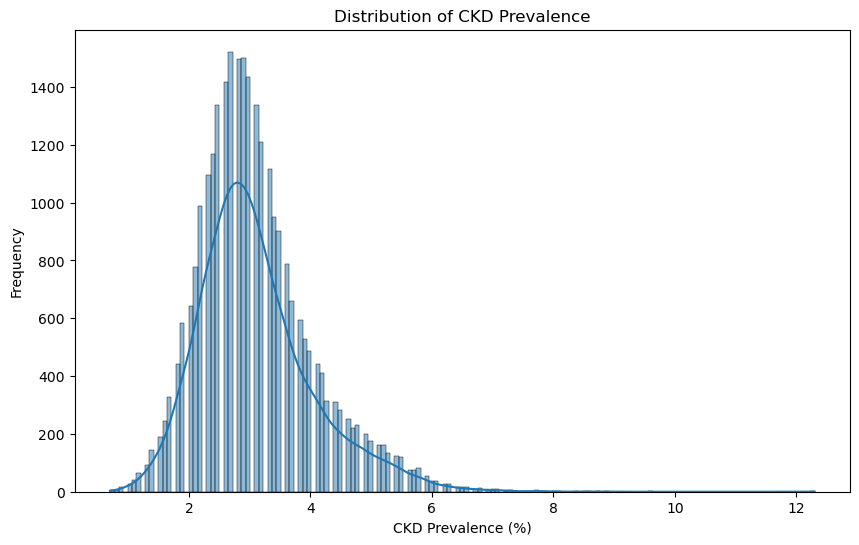

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Data_Value'], kde=True)
plt.title('Distribution of CKD Prevalence')
plt.xlabel('CKD Prevalence (%)')
plt.ylabel('Frequency')
plt.show()

### Chronic Kidney Diseases prevalence by state using a Box plot to compare both

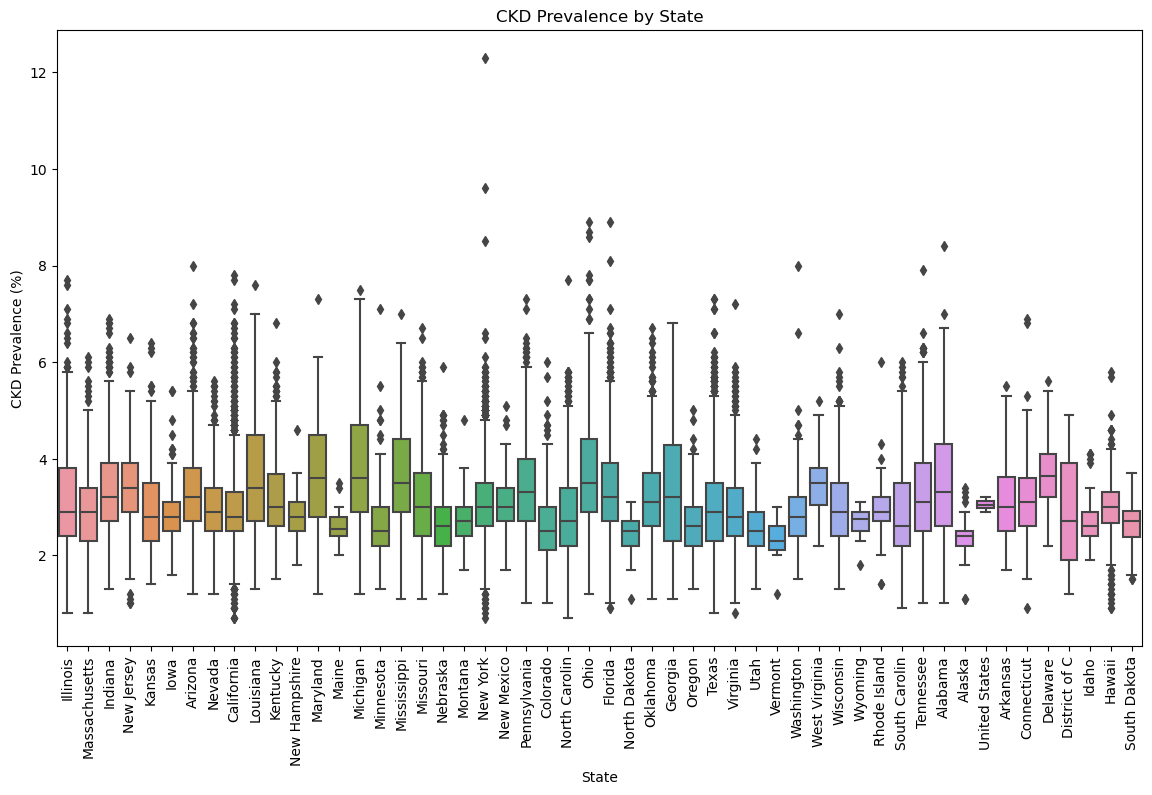

In [ ]:
plt.figure(figsize=(9, 4))
sns.boxplot(x='StateDesc', y='Data_Value', data=df)
plt.title('CKD Prevalence by State')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('CKD Prevalence (%)')
plt.show()

## 2. Trend Analysis

### Using a Bar Chart to show the Year-over-year change in Chronic Kidney Diseases prevalence

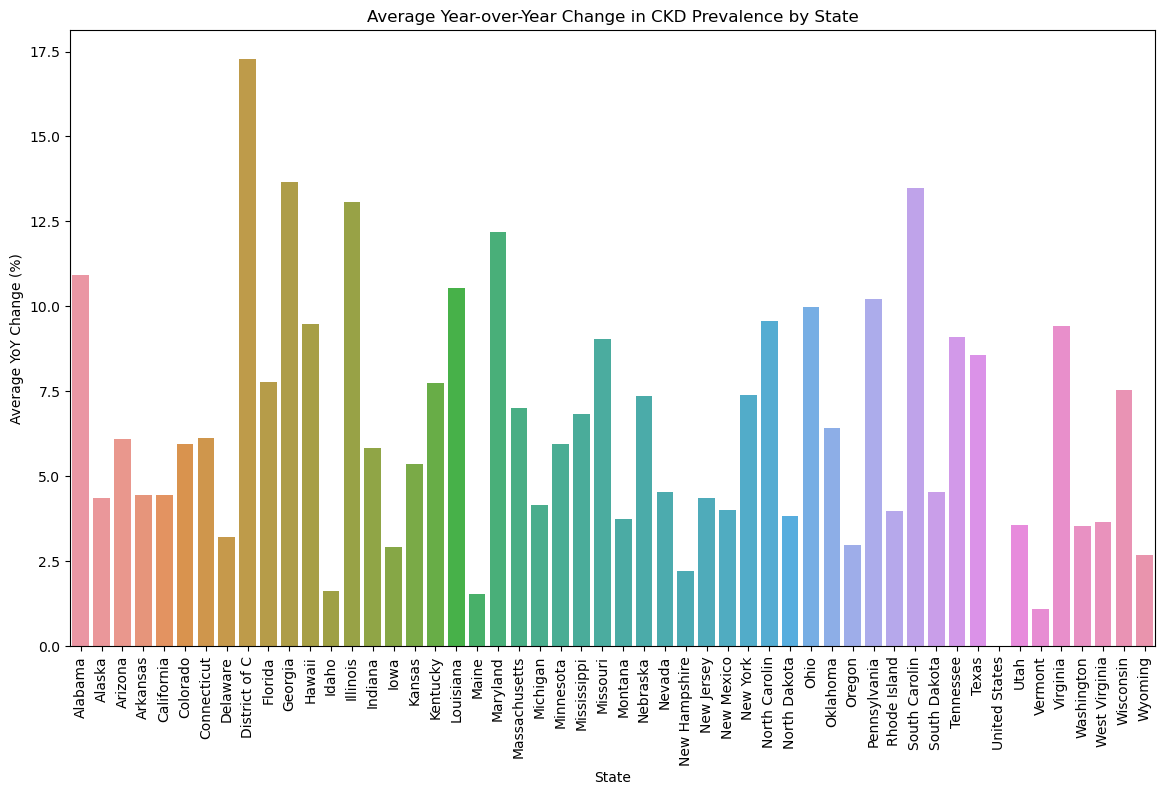

In [60]:
df['YoY_Change'] = df.groupby(['StateDesc', 'CityName'])['Data_Value'].pct_change() * 100
yoy_summary = df.groupby('StateDesc')['YoY_Change'].mean().reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(x='StateDesc', y='YoY_Change', data=yoy_summary)
plt.title('Average Year-over-Year Change in CKD Prevalence by State')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Average YoY Change (%)')
plt.show()